### 1. Align the reads to human genomes
You’re going to want to map these reads to the human genome first to remove any
contamination. To do this, check out the sample bowtie2 command from the PowerPoint

#### In terminal:
#### bowtie2 –p 4 --very-fast --no-unal -x /data/hg19/hg19 \-U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq

```-x``` specifies the path to the database you want to align your reads to.In this case, is the database containing the human genome (data/hg19/hg19)

```-U``` specifies the path to your input reads in FASTQ format. In this case, the input read is the read from the sequencing run at (data/lab6/illumina_reads.fastq)

```-S``` specifies the path to the output SAM file

```--un``` tells Bowtie to dump the reads that couldn’t be aligned into a separate FASTQ file.This file should contain the reads that cannot be aligned from the read to the human database we have.

#### Result (the output message):

1124714 reads; of these:

  1124714 (100.00%) were unpaired; of these:
  
    1028379 (91.43%) aligned 0 times
    
    87274 (7.76%) aligned exactly 1 time
    
    9061 (0.81%) aligned >1 times

8.57% overall alignment rate
    
#### Analysis:
In all the reads, there are 7.76% aligned 1 time with the human genome and 0.81% aligned more than 1 time. Since we are trying to find reads aligned to the S. oneidensis reference genome, this means that those reads are aligned with the human genome database,and these are the "contaminating human DNA" from our sequencing library--which is 8.57% in total.

Therefore, the output.sam file contains the reads that aligned with the human genome (8.57%), which are the contaminating human DNA. And the unpaired ones that aligned 0 time (unaligned.fastq, which is 91.43%) are the filtered out ones we want.

### 2. Align the reads to the S. oneidensis reference genome
Now, let’s find out how well your bacterium was sequenced. Run bowtie2 again, using the filtered reads you obtained in the previous step as input and the Shewanella reference genome as a database.



#### In terminal:
#### bowtie2 –p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \-U ~/lab6_Joanne/unaligned.fastq -S output2.sam --un unaligned2.fastq

In the unaligned2.fastq this contains the reads that are not aligned to the S. oneidensis. 

#### Result (output message):
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    299560 (29.13%) aligned 0 times
    687571 (66.86%) aligned exactly 1 time
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate

#### Analysis:
According to the output, the output2.sam contains reads that are aligned to the S. oneidensis (70.87%, which is the one we want). And the unaligned2.fastq contains what our filtered library does not aligned with S. oneidensis genome (29.13%)

### 3. Generate a coverage plot
At this point, you should have a SAM file containing the alignment of your filtered reads to the
S. oneidensis reference genome. Referring to the PowerPoint, please convert this file to BAM,
sort it, index it, and use “depth” to generate a file containing the depth of coverage for every
position in the reference genome.

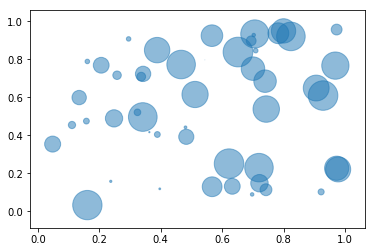

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()